<body style="background-color:#fafaf5;">
<div style="text-align: center;background: transparent;">
  <img src="./logo.png" style="width: 360px; height: 90px;">
</div>
<div style="text-align: center;">
  <div class="thicker">Spring 2025 BAA1030 Data Analytics & Story Telling (20074)</div>
  <div><span class="thicker">Student Name:</span> Persis Suchitra Isaac (48507)</div>
  <div><span class="thicker">Programme:</span> MSc in Management (Strategy)</div><br>
</div>

## **The data tells a powerful story. What will it take to change the outcome?**
<p> 🔴 Despite decades of progress, thousands of infants worldwide are still born to mothers with HIV each year. Early virological testing is critical to ensuring timely diagnosis and life-saving treatment, but are all babies getting tested in time?

⚠️ Changing the outcome requires removing barriers that prevent babies from getting early HIV testing and treatment. This involves improving healthcare services, reducing stigma, and supporting community programs to ensure every child is diagnosed on time and receives the care needed for a healthy start.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *

indicator_df = pd.read_csv('unicef_indicator_1.csv')
metadata_df = pd.read_csv('unicef_metadata.csv')

indicator_total = indicator_df
merged_df = pd.merge(indicator_total, metadata_df, left_on=['alpha_3_code', 'time_period'], right_on=['alpha_3_code', 'year'])
#merged_df = pd.merge(indicator_total, metadata_df, left_on=['alpha_3_code', 'time_period'], right_on=['alpha_3_code', 'year'], how='inner')

country_means = merged_df.dropna().groupby('country_x').mean(numeric_only =True).reset_index()

## **A Global Snapshot of Infant HIV Testing Through The Years 🌍**
<p>The global map of infant HIV testing reveals dramatic disparities between countries. While some nations have made remarkable progress in reaching vulnerable infants, others still have a long way to go in terms of coverage. This map 🌍 highlights regions where early diagnosis efforts are strongest and where urgent action is still needed to save and protect the youngest lives. 🚼</p>

In [2]:
import plotly.graph_objects as go
country_means_obs = indicator_total.groupby(['country', 'alpha_3_code'])['obs_value'].mean().reset_index()
# Get unique years
years = sorted(indicator_total['time_period'].unique())

fig = go.Figure()

for year in years:
    yearly_data = indicator_total[indicator_total['time_period'] == year][['country', 'alpha_3_code', 'obs_value']]

    fig.add_trace(
        go.Choropleth(
            locations=yearly_data['alpha_3_code'],  
            z=yearly_data['obs_value'],            
            text=yearly_data['country'],
            colorscale='PLASMA_R',
            autocolorscale=False,
            marker_line_color='black',
            marker_line_width=0.5,
            colorbar_title='HIV+ Infant Testing',
            visible=False
        )
    )

if len(fig.data) > 0:
    fig.data[0].visible = True

steps = []
for i, year in enumerate(years):
    step = dict(
        method='update',
        args=[{'visible': [False] * len(fig.data)}, 
              {'title.text': f'Why HIV+ Are Births Still So High?({year})'}],
        label=str(year)
    )
    step['args'][0]['visible'][i] = True  
    steps.append(step)

sliders = [dict(
    active=0,  
    currentvalue={'prefix': 'Year: '},
    pad={'t': 0},
    steps=steps
)]

fig.update_layout(
    title_text='Reported HIV Tests in HIV-Exposed Infants (2010–2023)',
    geo=dict(
        projection_type='orthographic', 
        showland=True,
        landcolor='#f8fae6',
        showocean=True,
        oceancolor='#b0d5d9',
        showcountries=False,
        countrycolor='Grey'
    ),
    margin=dict(l=50, r=50, t=90, b=50),
    sliders=sliders
)

fig.show()

## **<b>South Africa’s Heavy Burden of Infant HIV+ 🧬</b>**
South Africa has the highest number of HIV-positive mothers giving birth, with over 3.3 million cases, way more than Mozambique, Kenya, and Uganda. 📊 The bar chart illustrates this somber fact, displaying both the scope of the epidemic as well as the country's commitment to mass early testing. 🏥

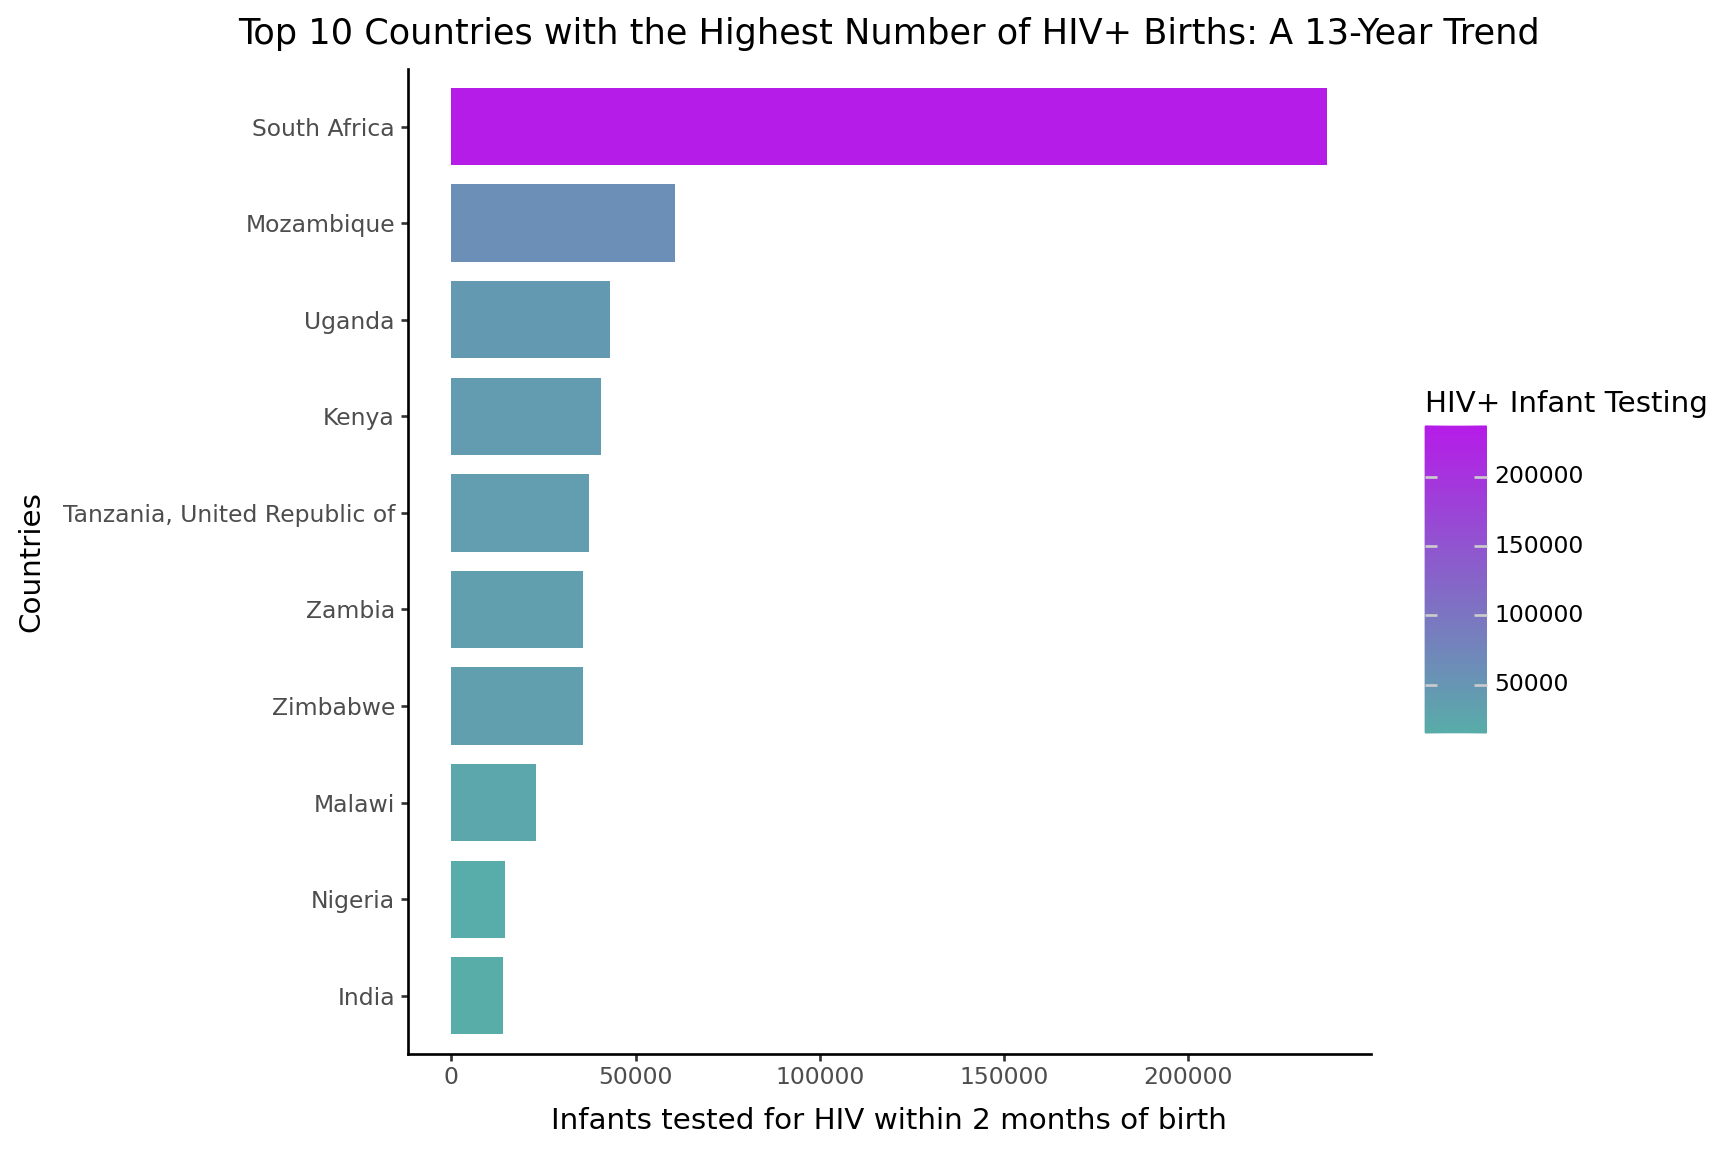

In [3]:
top_10 = country_means_obs.sort_values('obs_value', ascending=False).head(10)

p3 = (ggplot(top_10, aes(x='reorder(country, obs_value)', y='obs_value', fill="obs_value",width=0.8)) +
      geom_col( stat="identity") +
      scale_fill_gradient(low="#58ada9", high="#b51ce8", name="HIV+ Infant Testing") +
      coord_flip() +
      theme_classic() +
      labs(x='Countries', y='Infants tested for HIV within 2 months of birth', title='Top 10 Countries with the Highest Number of HIV+ Births: A 13-Year Trend') +
      theme(figure_size=(9, 6)))
p3

## **GDP per Capita vs. Infant HIV Testing: Limited Impact on Healthcare Outcomes**
<p>This graph compares GDP per capita with infants born to HIV-positive mothers who received timely testing. 📊 While economic growth is often linked to better healthcare, the data shows GDP alone doesn't significantly impact testing rates. 💡 This suggests factors like public health policies, community outreach, and healthcare infrastructure play a bigger role in ensuring timely testing.🏥</p>

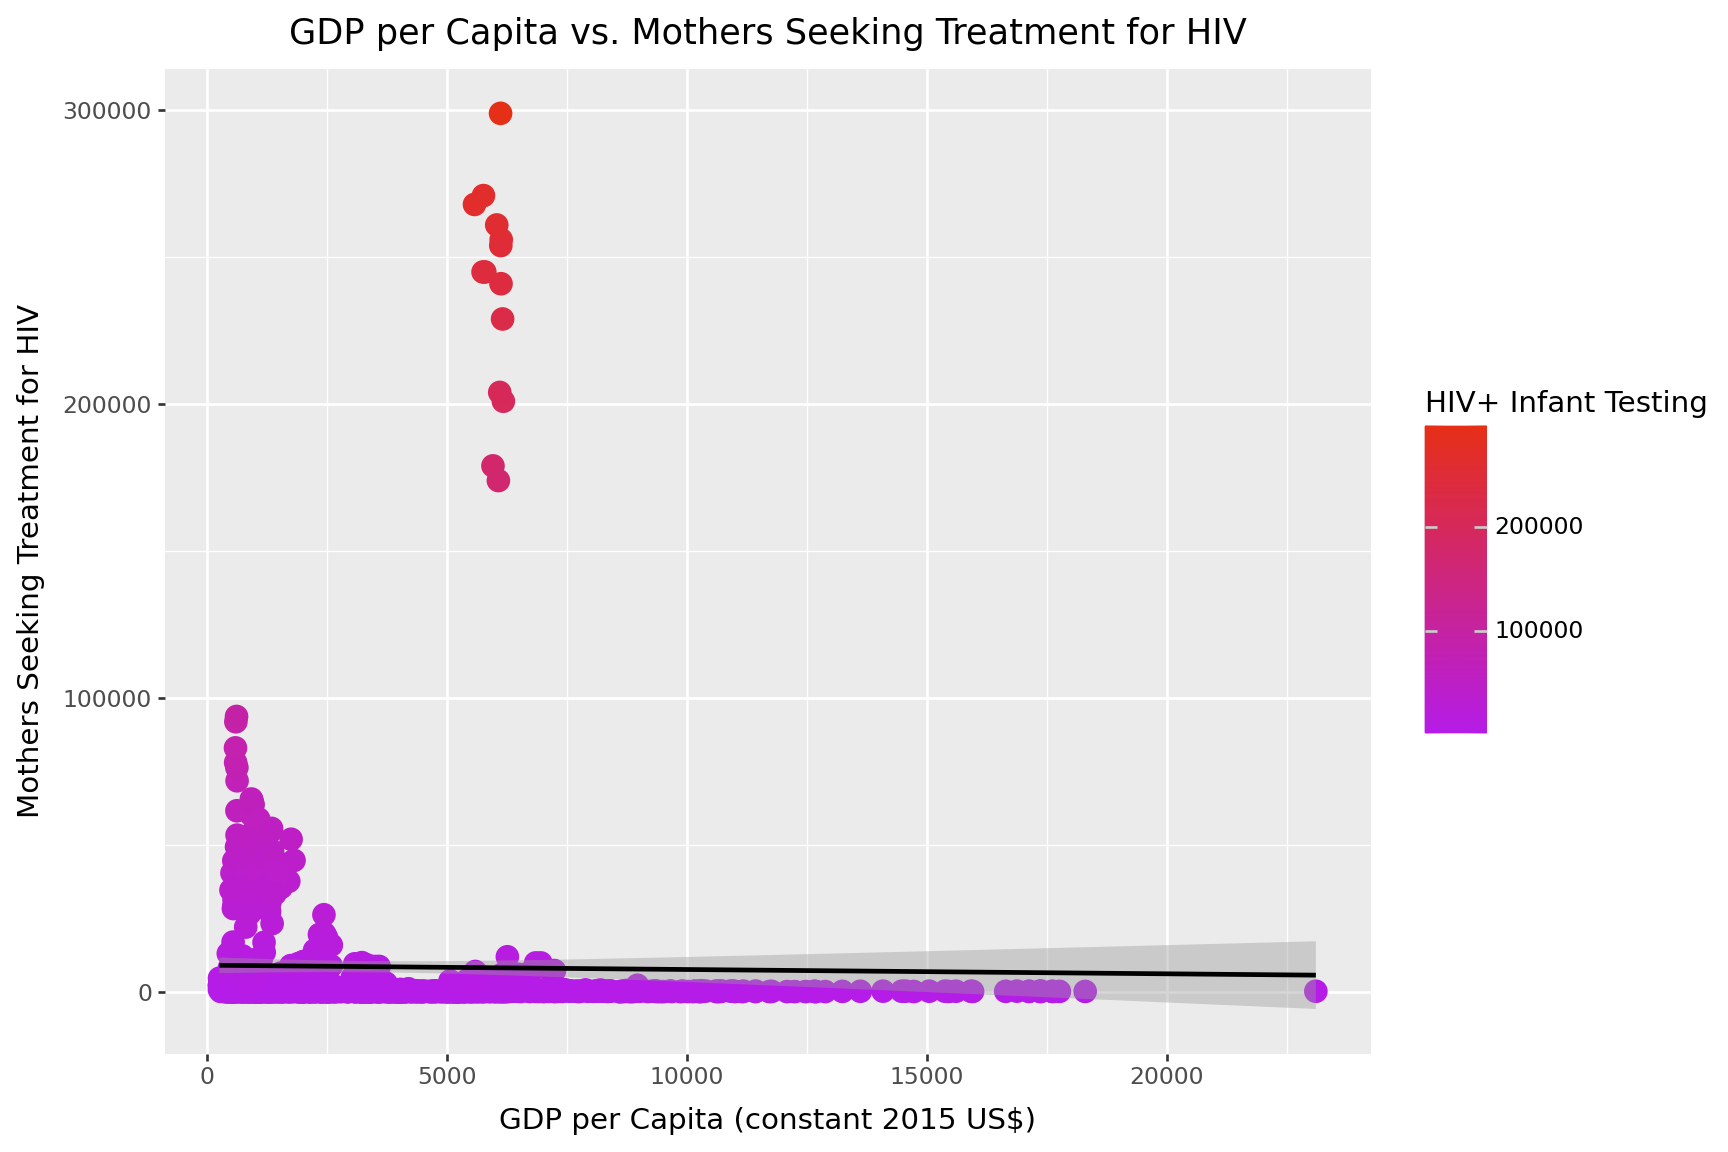

In [4]:
gdp_plot = merged_df[merged_df['GDP per capita (constant 2015 US$)'] > 0]
gdp_plot = gdp_plot[gdp_plot['obs_value'] > 0]

p1 = (ggplot(gdp_plot, aes(x='GDP per capita (constant 2015 US$)', y='obs_value',color= 'obs_value')) +
      geom_point(size=4.0) +
      scale_color_gradient(low="#b51ce8", high="#e62f17", name="HIV+ Infant Testing") +
      geom_smooth(method='lm') +
      labs(x='GDP per Capita (constant 2015 US$)',
           y='Mothers Seeking Treatment for HIV',
           title='GDP per Capita vs. Mothers Seeking Treatment for HIV') +
      theme(figure_size=(9, 6)))

p1

## **Rising HIV+ Births Impacting Life Expectancy**
<p>💡Are countries with successful HIV prevention seeing better long-term health outcomes?</p>
<p>The rise in HIV+ births has been contributing to a decline 📉 in life expectancy in certain high-burden countries, even in the face of advanced healthcare improvements🏥💉. While progress has been made in HIV prevention 🚫🦠 and treatment, the continuing increase in HIV+ births is putting additional strain on healthcare systems and affecting overall population health outcomes.</p>

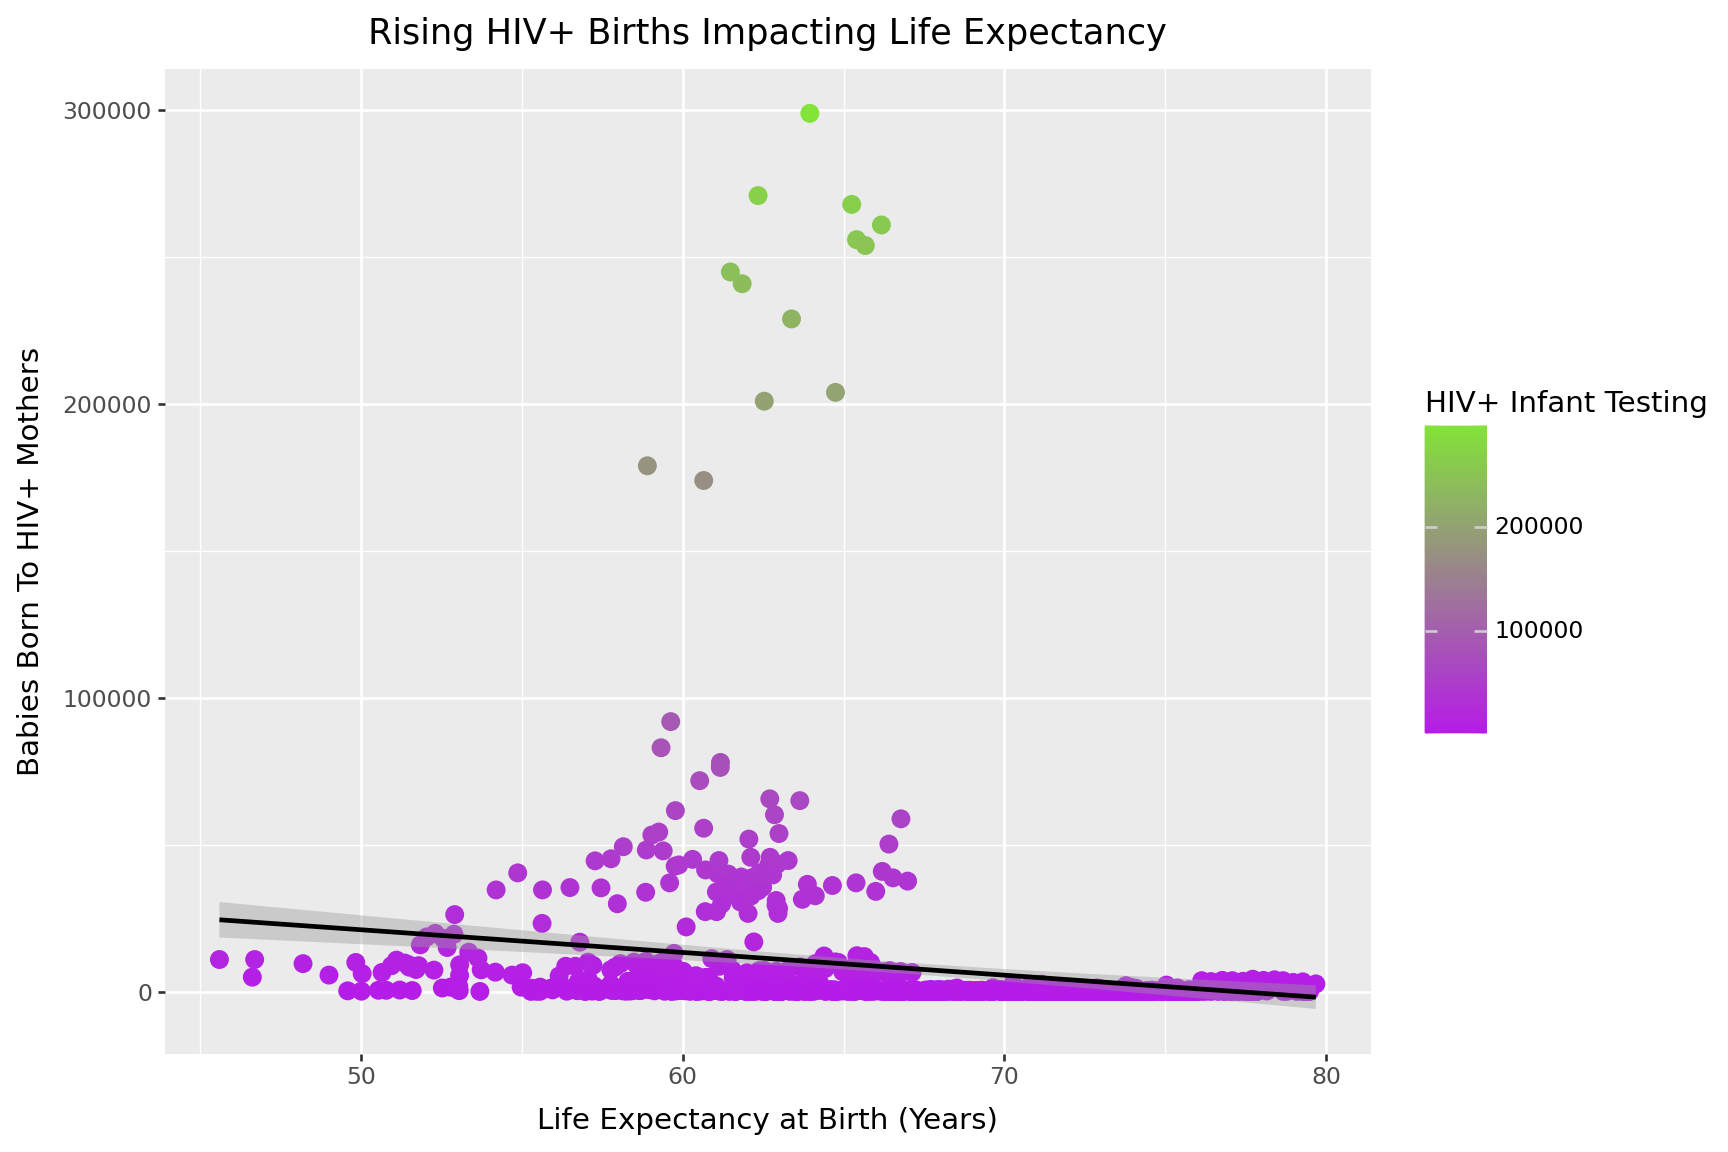

In [5]:
life_plot = merged_df[merged_df['Life expectancy at birth, total (years)'] > 0]
p2 = (ggplot(life_plot, aes(x='Life expectancy at birth, total (years)', y='obs_value',color='obs_value')) +
      geom_point(size=3.0) +
      geom_smooth(method="lm") +
      scale_color_gradient(low='#b51ce8', high='#82e339', name='HIV+ Infant Testing') +
      theme(figure_size=(9, 6)) +
      labs(x='Life Expectancy at Birth (Years)', y='Babies Born To HIV+ Mothers', title='Rising HIV+ Births Impacting Life Expectancy'))
p2

## **The 13-Year Journey: Infant HIV Testing: 2010-2023**
<p>Tracking data over 13 years, this time series reveals the global shift in the number of babies born to HIV-positive mothers 🤰💉across multiple countries. While many nations show a steady decline 📉, some continue to struggle with higher rates. These trends reflect the combined impact of healthcare improvements, international aid 🌐🤝, policy changes 📜, and ongoing challenges like healthcare access 🚑 and social stigma 🚫.</p>

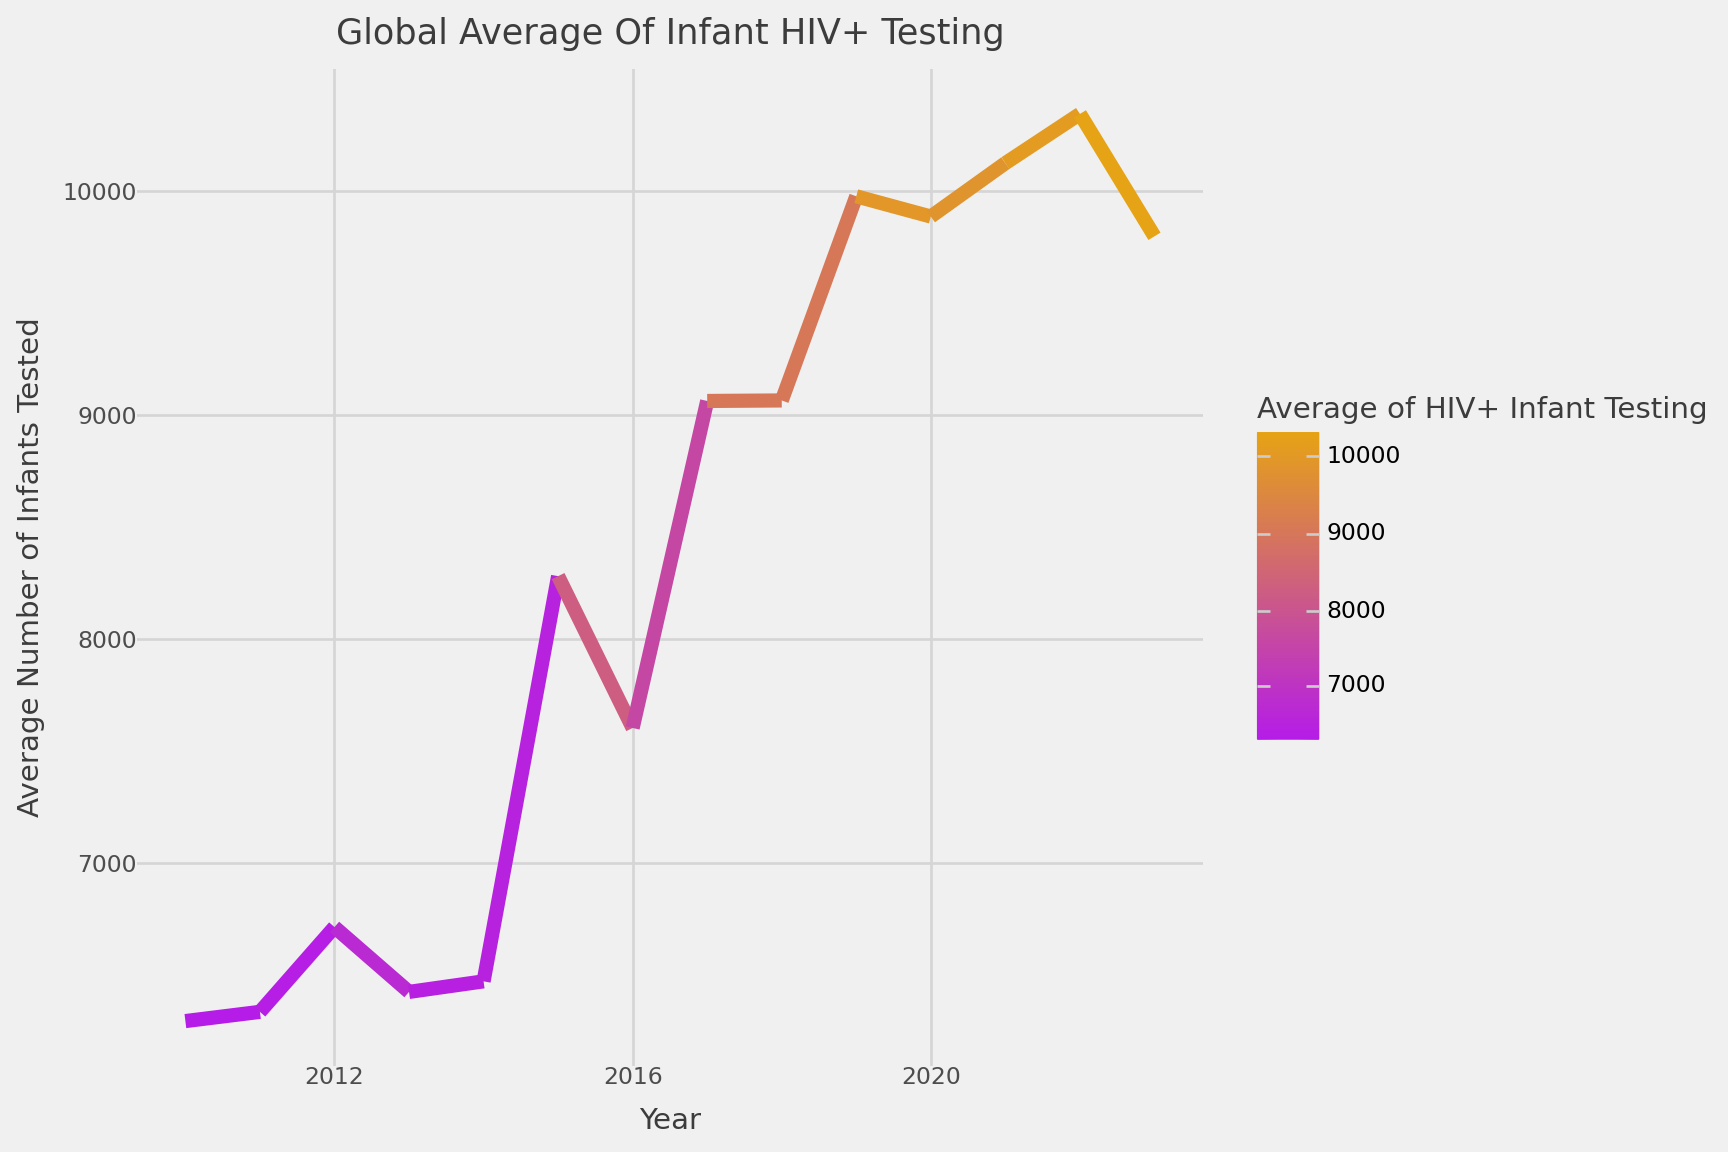

In [6]:
global_trend = indicator_total.groupby('time_period')['obs_value'].mean().reset_index()

p5 = (ggplot(global_trend, aes(x='time_period', y='obs_value', color ="obs_value")) +
      geom_line(size=3.0)+
      theme_538() +
      theme(figure_size=(9, 6)) +
      scale_color_gradient(low='#b51ce8', high='#e6a315', name='Average of HIV+ Infant Testing') +
      labs(x='Year', y='Average Number of Infants Tested', title='Global Average Of Infant HIV+ Testing'))

p5

## **Uneven Progress: Child HIV Testing, Healthcare Access, and Economic Factors**
<p>This line graph 📉 compares the progress among **South Africa, Mozambique, and Uganda**. **Uganda** demonstrates a more consistent **decline in HIV+ births**, hinting at successful prevention programs ✅. **Mozambique**'s improvements are **less steady**, possibly reflecting periods of political or healthcare system disruptions. Meanwhile, **South Africa,** despite having the largest resources 💰, faces **ongoing challenges** ⚠️, especially in rural regions 🌄.</p>

(Line Graph - Matplotlib Focused on 3 Countries)

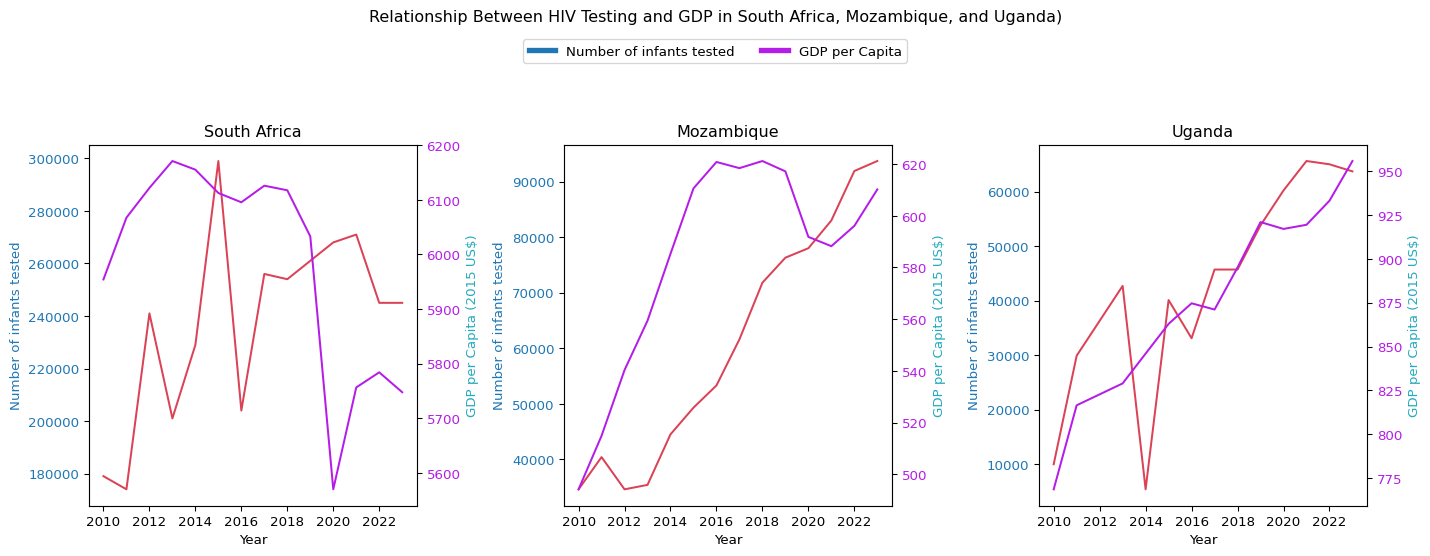

In [7]:
from matplotlib.lines import Line2D

countries = ['South Africa', 'Mozambique', 'Uganda']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, country in enumerate(countries):
    country_data = merged_df[merged_df['country_x'] == country]

    ax = axes[i]

    ax.plot(country_data['time_period'], country_data['obs_value'], color='#db4256')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of infants tested', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')

    ax_twin = ax.twinx()
    ax_twin.plot(country_data['time_period'], country_data['GDP per capita (constant 2015 US$)'], color='#b51ce8')
    ax_twin.set_ylabel('GDP per Capita (2015 US$)', color='#24aabf')
    ax_twin.tick_params(axis='y', labelcolor='#b51ce8')

    ax.set_title(country)

legend_lines = [
    Line2D([0], [0], color='tab:blue', lw=4),
    Line2D([0], [0], color='#b51ce8', lw=4)
]
fig.legend(legend_lines, ['Number of infants tested', 'GDP per Capita'], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

fig.suptitle('Relationship Between HIV Testing and GDP in South Africa, Mozambique, and Uganda)', y=1.15)

plt.tight_layout()

plt.show()

## **Highlights**
<div style="text-align: center;background: transparent;">
  <img src="./hiv_testing.png" style="width: 450px; height: 400px;">
</div>
This image highlights that HIV testing is free and confidential. Removing these barriers can significantly increase the number of infants who receive timely testing, as seen in the UNICEF data, where countries with supportive policies show better testing rates.

## **Conclusion:**

<p>The data reveals uneven progress in infant HIV testing across countries. Despite economic resources, regions like South Africa continue to face challenges, highlighting that healthcare access and policy effectiveness play a crucial role. Targeted strategies are needed to address these disparities and ensure timely testing for all infants. 🌍🧑‍⚕️</p>